In [248]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [249]:
df=pd.read_csv('C:\\Users\\Dell\\Desktop\\Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [250]:
df.shape

(374, 13)

In [251]:
#There are 13 columns and 374 rows present in the data.

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [253]:
#There are both numerical and Categorical columns present in dataset.

In [254]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [255]:
#the data is about age between 27 to 59 means these are working Professional data.
# These professional have around average 7 hours of  sleep .
#there is not much difference so may be there are no outliers are present.

In [256]:
num=df.select_dtypes(include=np.number)
num

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,1,27,6.1,6,42,6,77,4200
1,2,28,6.2,6,60,8,75,10000
2,3,28,6.2,6,60,8,75,10000
3,4,28,5.9,4,30,8,85,3000
4,5,28,5.9,4,30,8,85,3000
...,...,...,...,...,...,...,...,...
369,370,59,8.1,9,75,3,68,7000
370,371,59,8.0,9,75,3,68,7000
371,372,59,8.1,9,75,3,68,7000
372,373,59,8.1,9,75,3,68,7000


In [257]:
cat=df.select_dtypes(exclude=np.number)
cat

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
0,Male,Software Engineer,Overweight,126/83,None
1,Male,Doctor,Normal,125/80,None
2,Male,Doctor,Normal,125/80,None
3,Male,Sales Representative,Obese,140/90,Sleep Apnea
4,Male,Sales Representative,Obese,140/90,Sleep Apnea
...,...,...,...,...,...
369,Female,Nurse,Overweight,140/95,Sleep Apnea
370,Female,Nurse,Overweight,140/95,Sleep Apnea
371,Female,Nurse,Overweight,140/95,Sleep Apnea
372,Female,Nurse,Overweight,140/95,Sleep Apnea


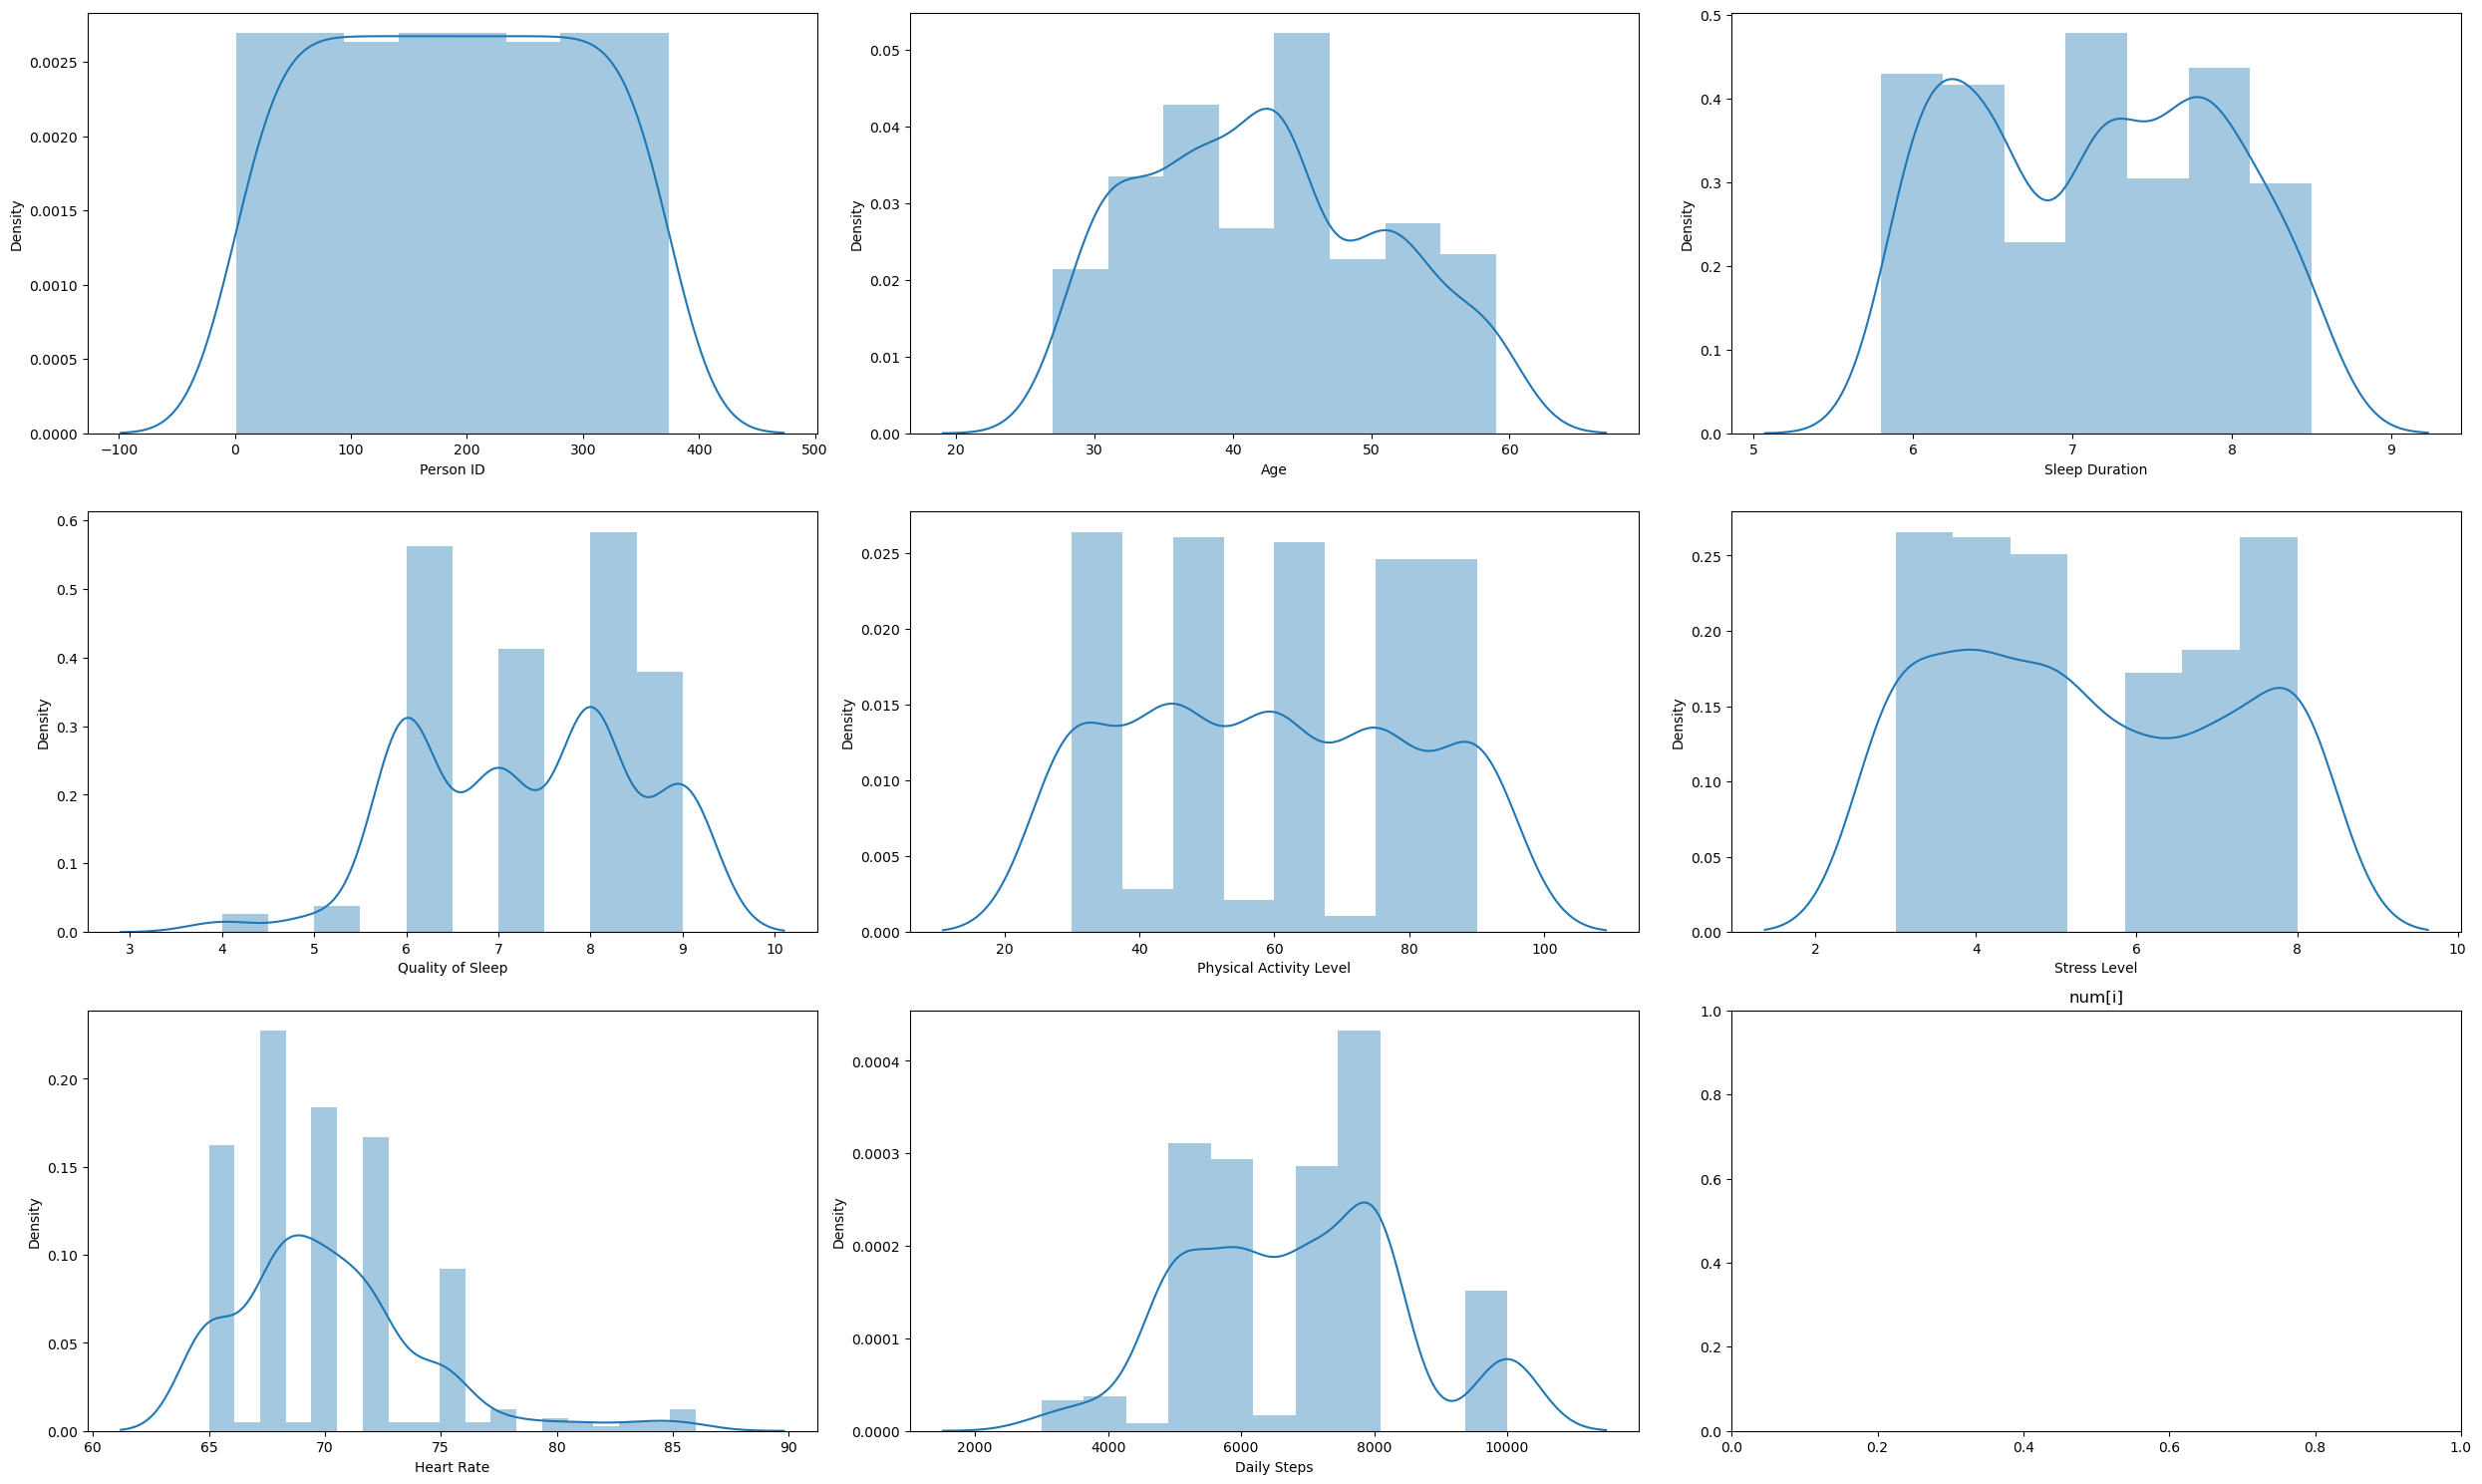

In [258]:
fig, ax= plt.subplots(3,3, figsize=(25,15))
for i, subplot in zip(num, ax.flatten()):
    sns.distplot(num[i], ax=subplot)
    plt.title('num[i]')
plt.tight_layout()
plt.show()

In [259]:
#Data is almost normally distributed so need for tranformation.

In [260]:
import warnings
warnings.filterwarnings('ignore')

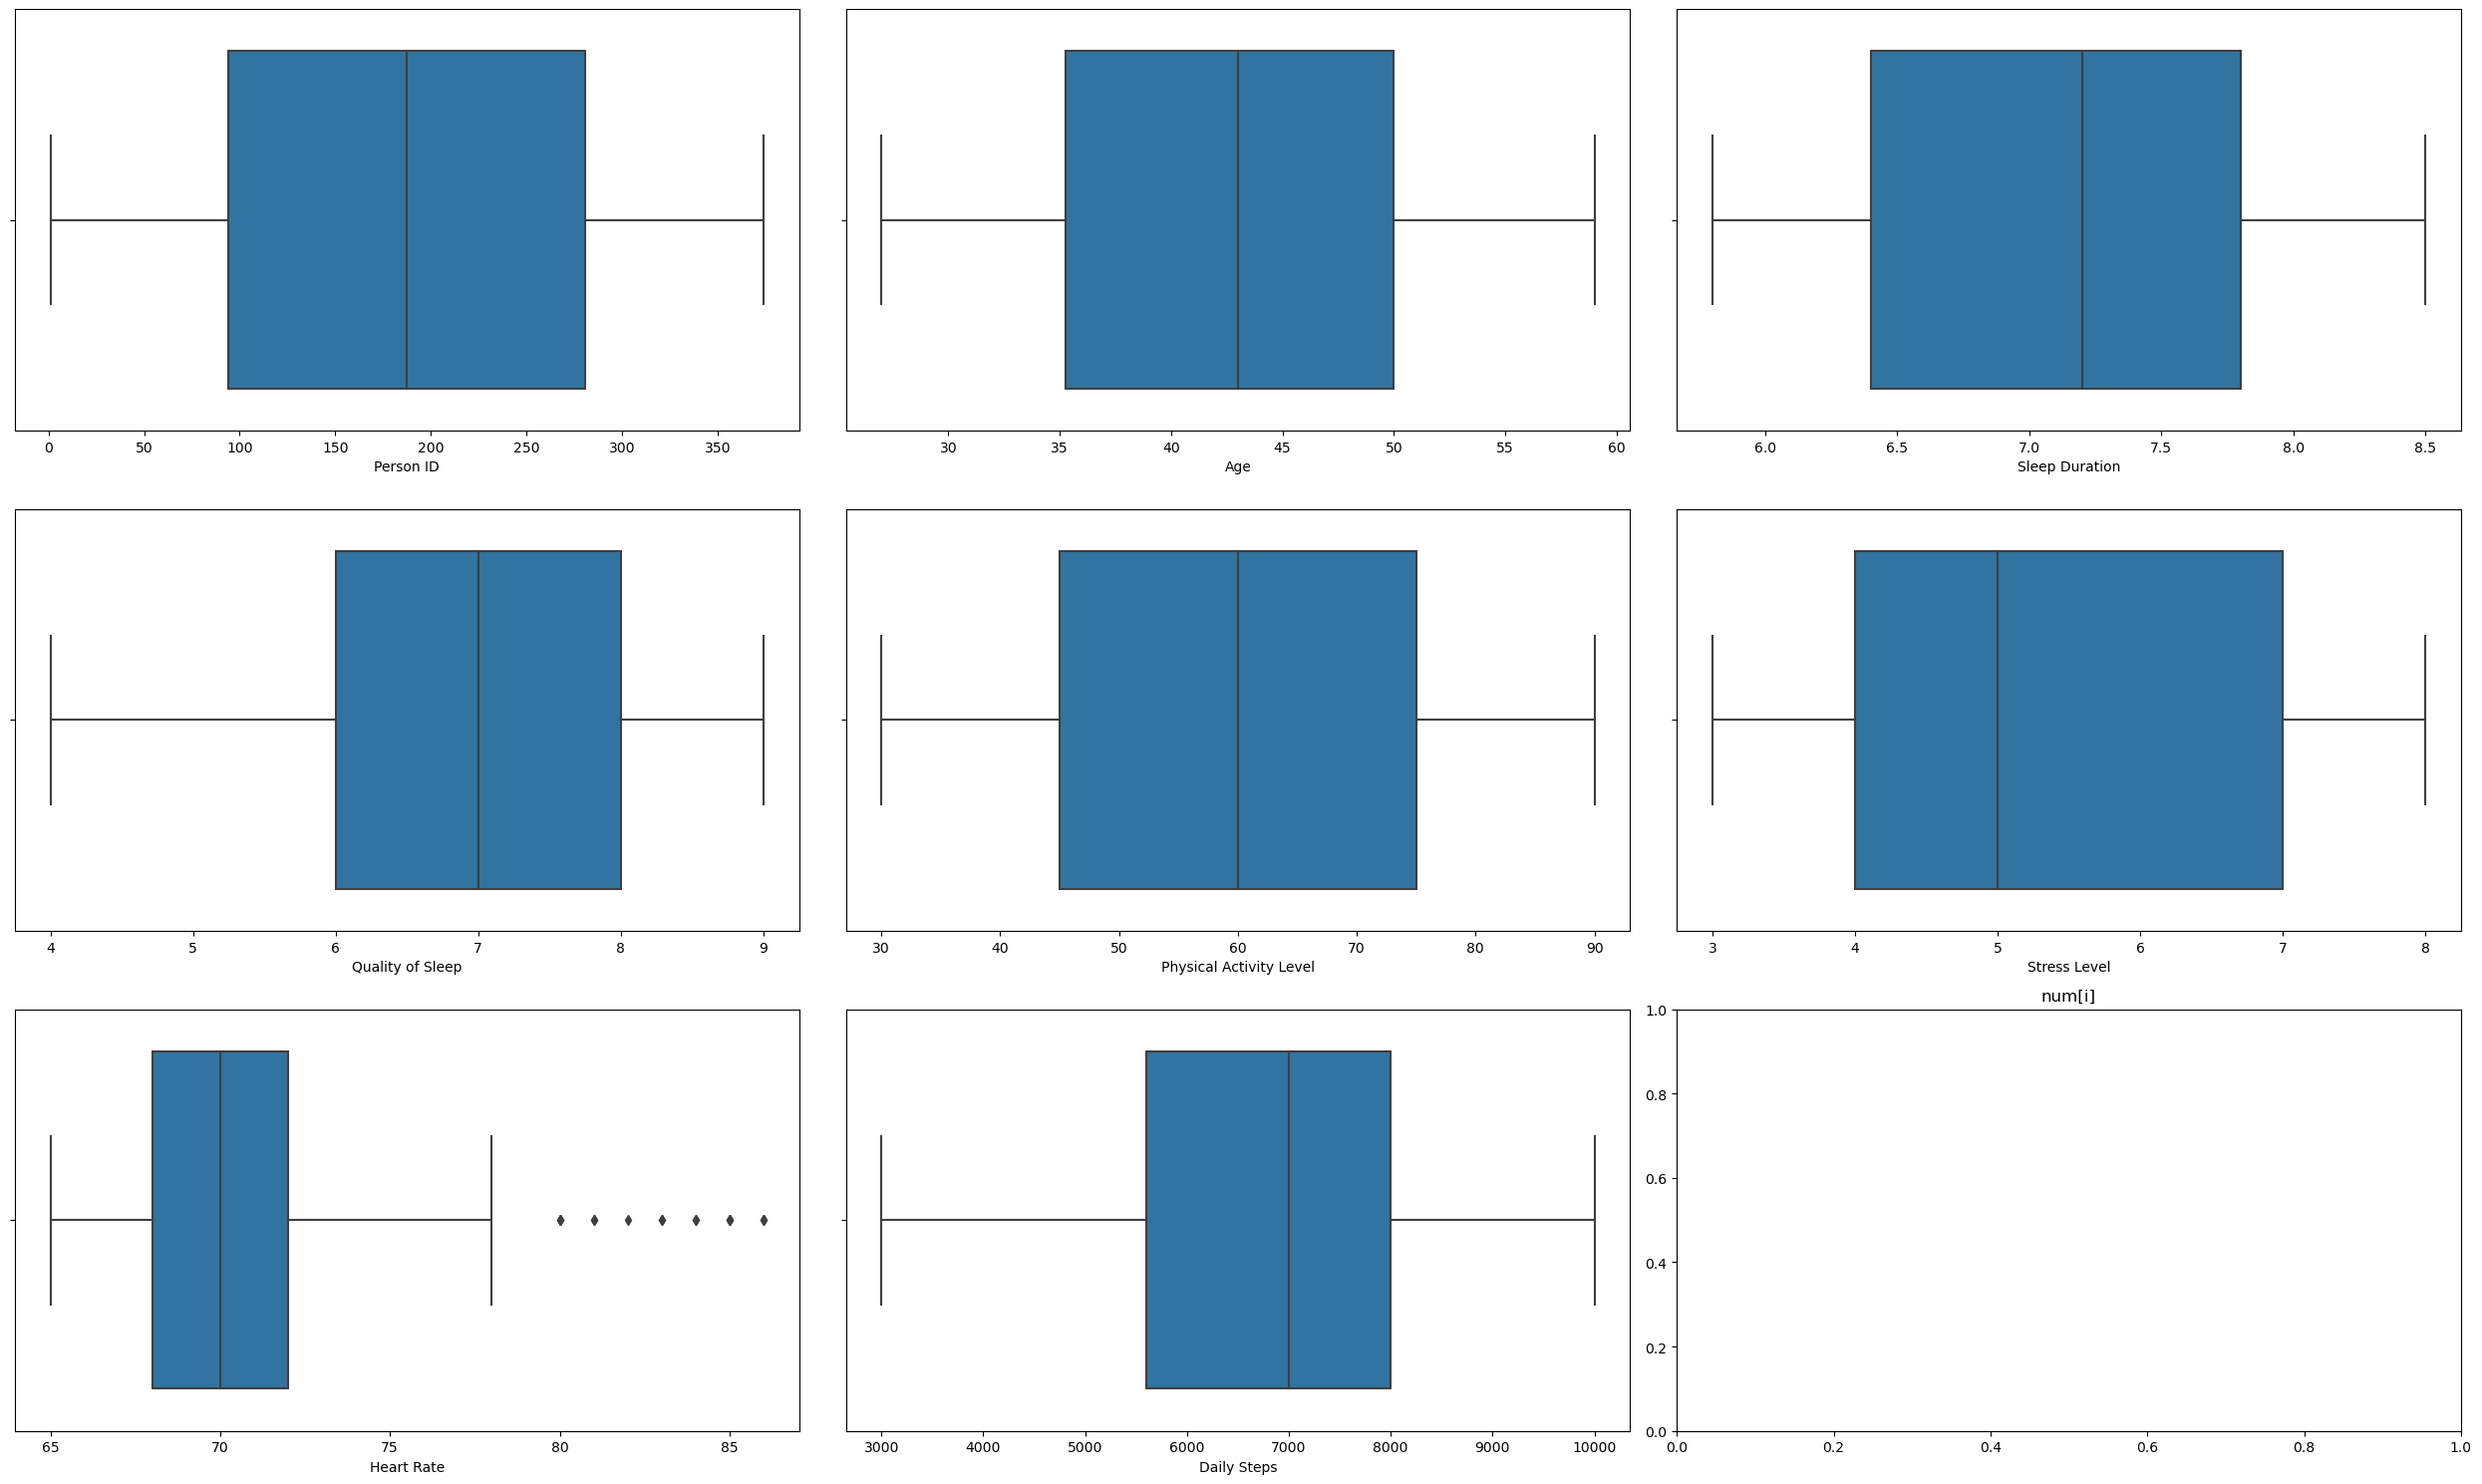

In [261]:
fig, ax= plt.subplots(3,3, figsize=(25,15))
for i, subplot in zip(num, ax.flatten()):
    sns.boxplot(num[i], ax=subplot)
    plt.title('num[i]')
plt.tight_layout()
plt.show()

In [262]:
#data has no outliers present except heart_rate.So no need for capping/ dropping them

<AxesSubplot:>

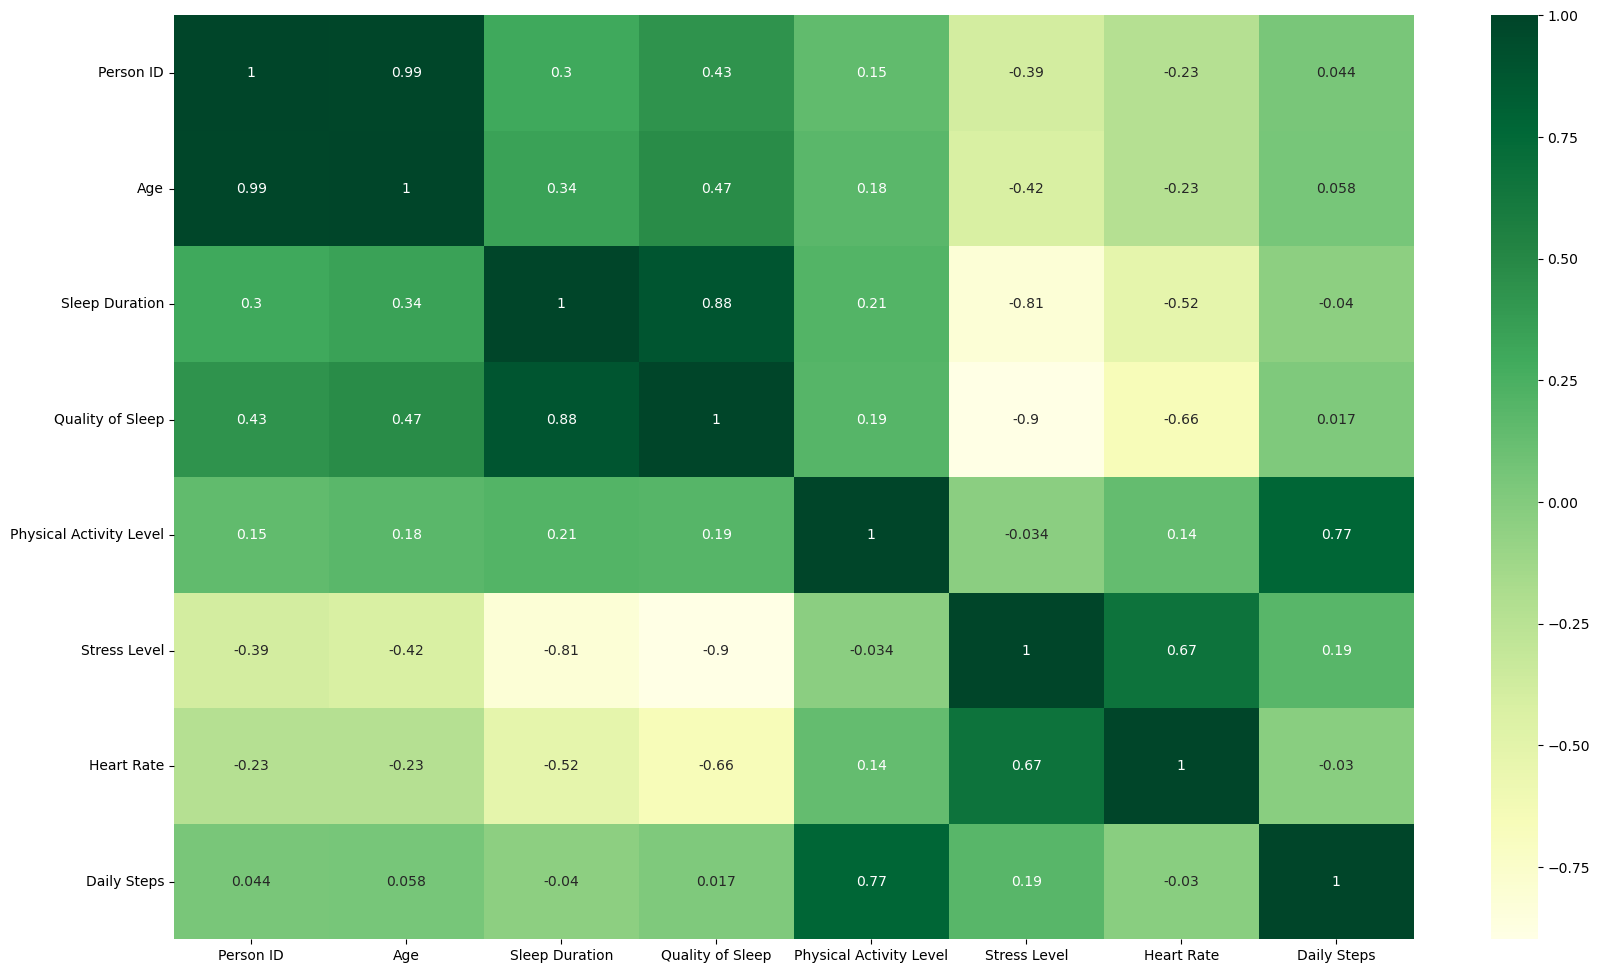

In [263]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,cmap="YlGn")

In [264]:
#We can Conclude:
#Physical Activity and Dalily steps are highly correlated.
#Quality of sleep and Sleep duaration are also correlated to each other.

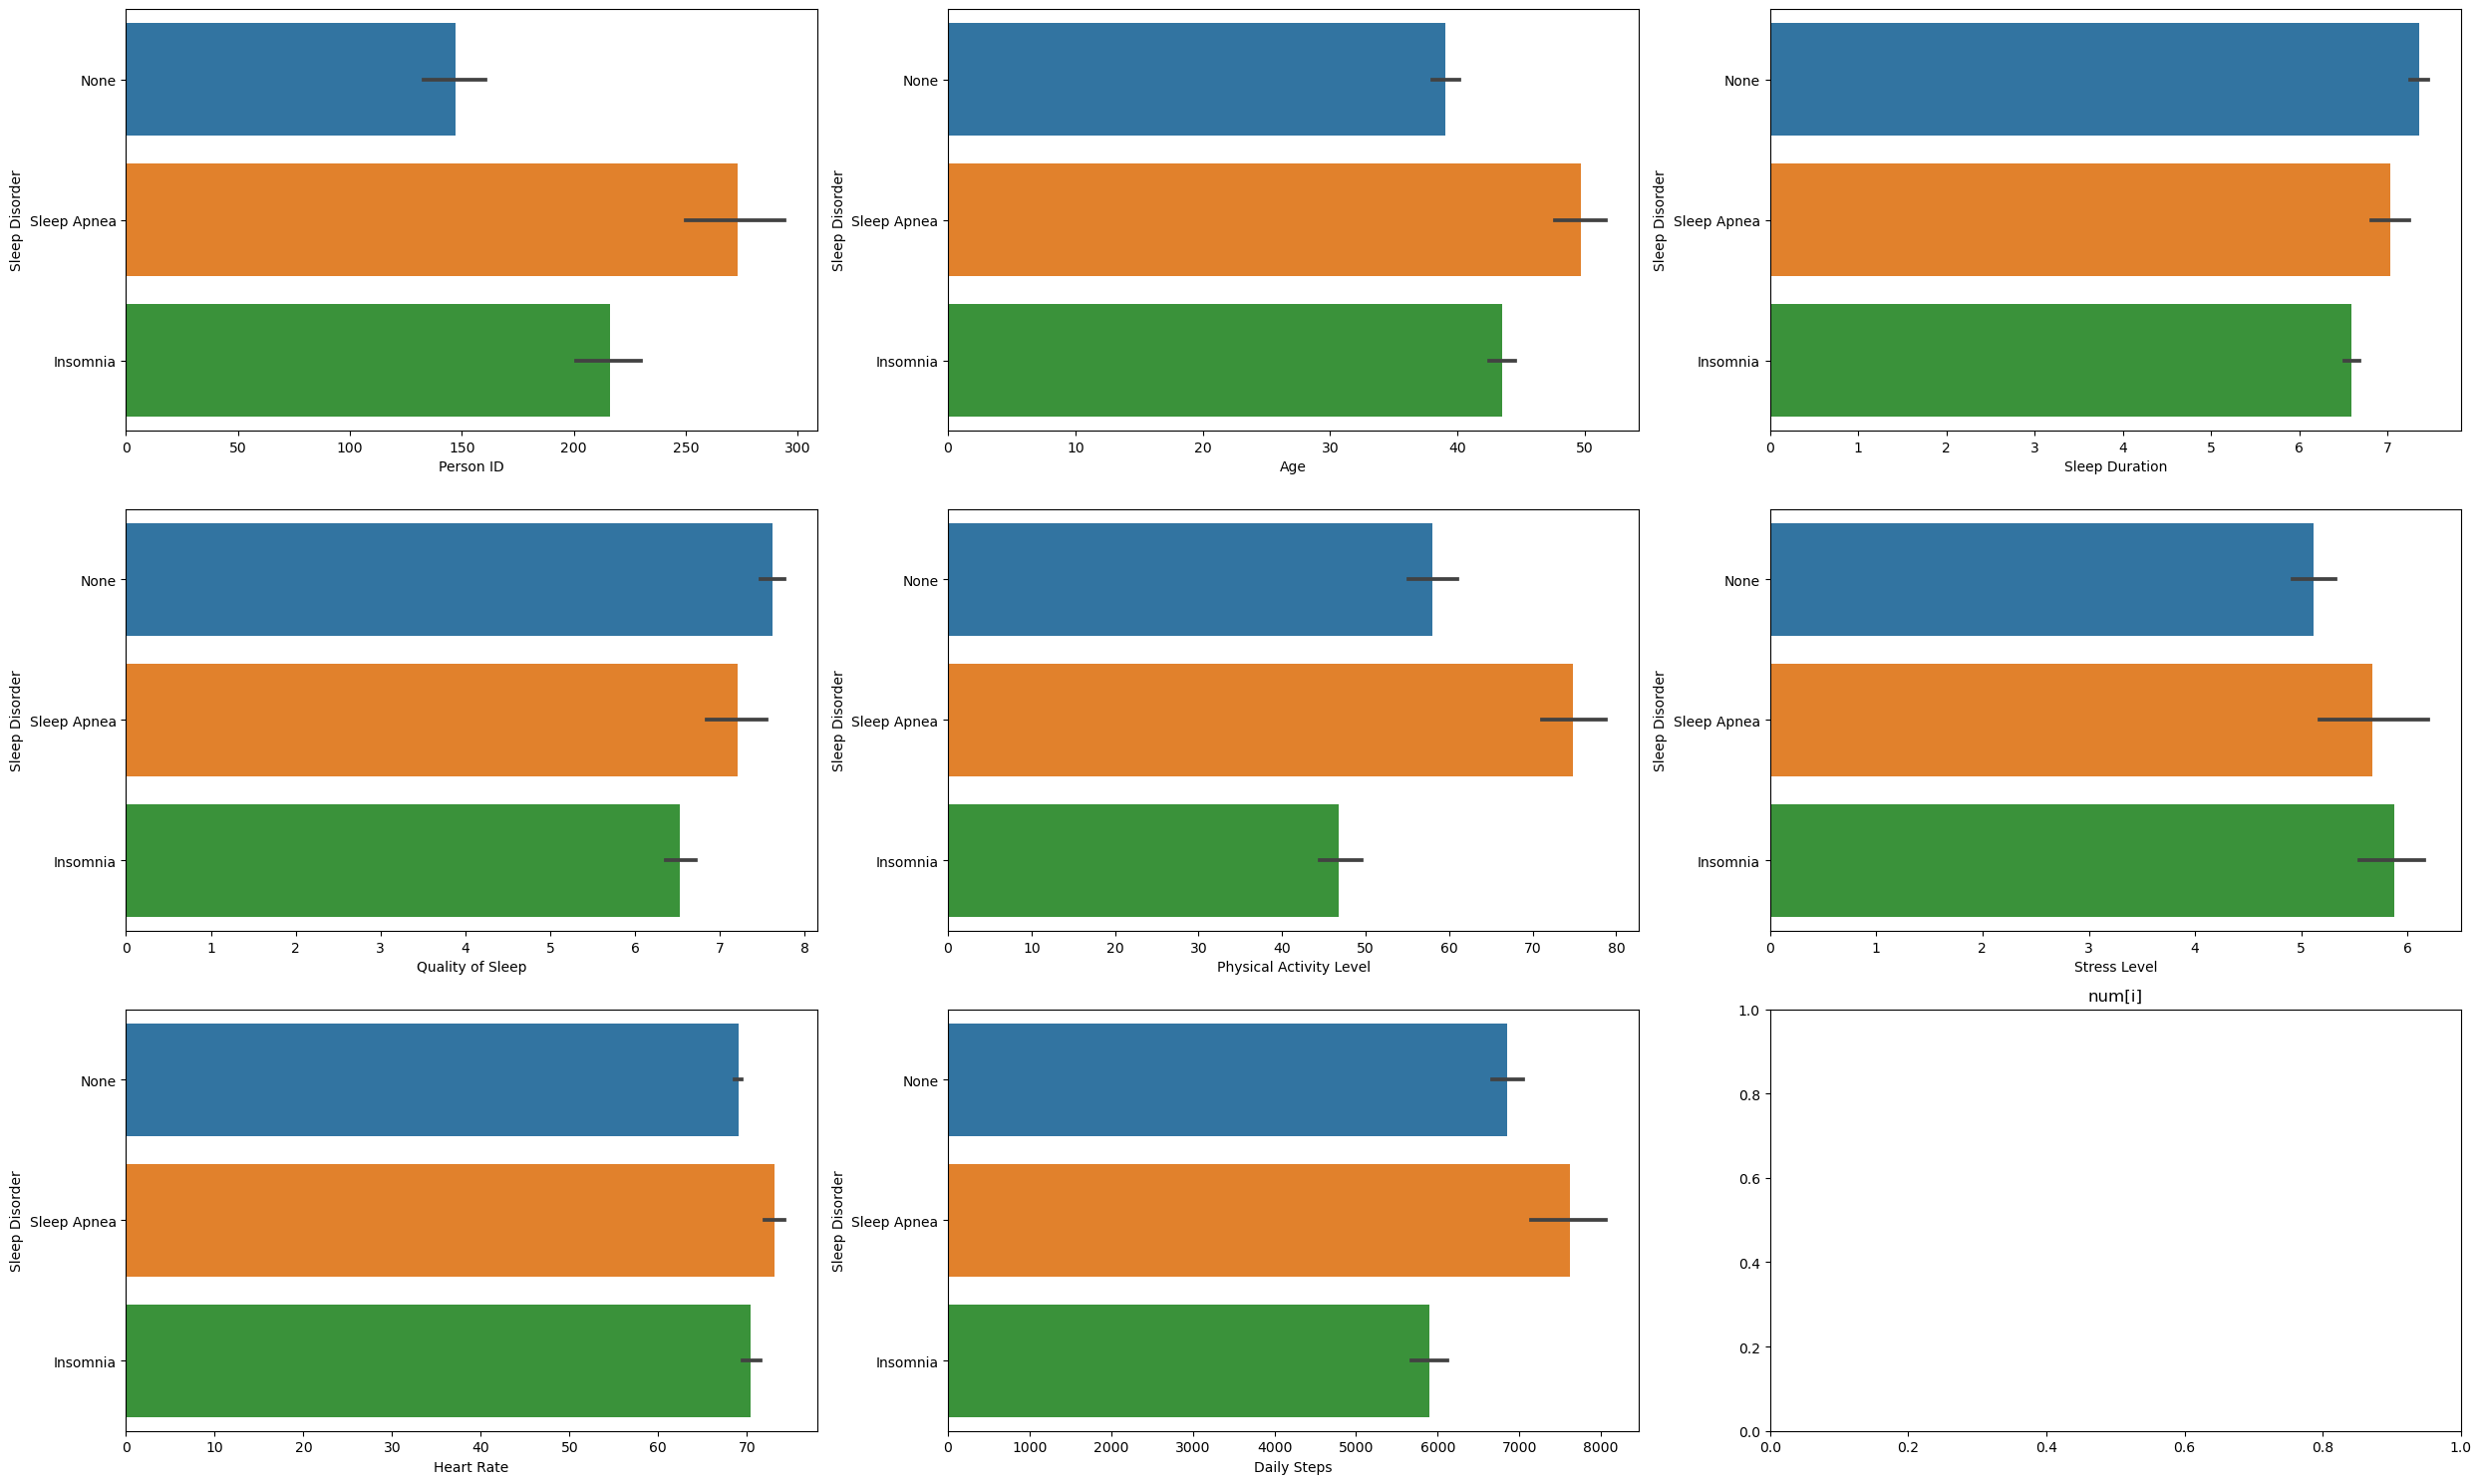

In [265]:
fig, ax= plt.subplots(3,3, figsize=(25,15))
for i, subplot in zip(num, ax.flatten()):
    sns.barplot(num[i],y=df['Sleep Disorder'] ,ax=subplot)
    plt.title('num[i]')
plt.tight_layout()
plt.show()

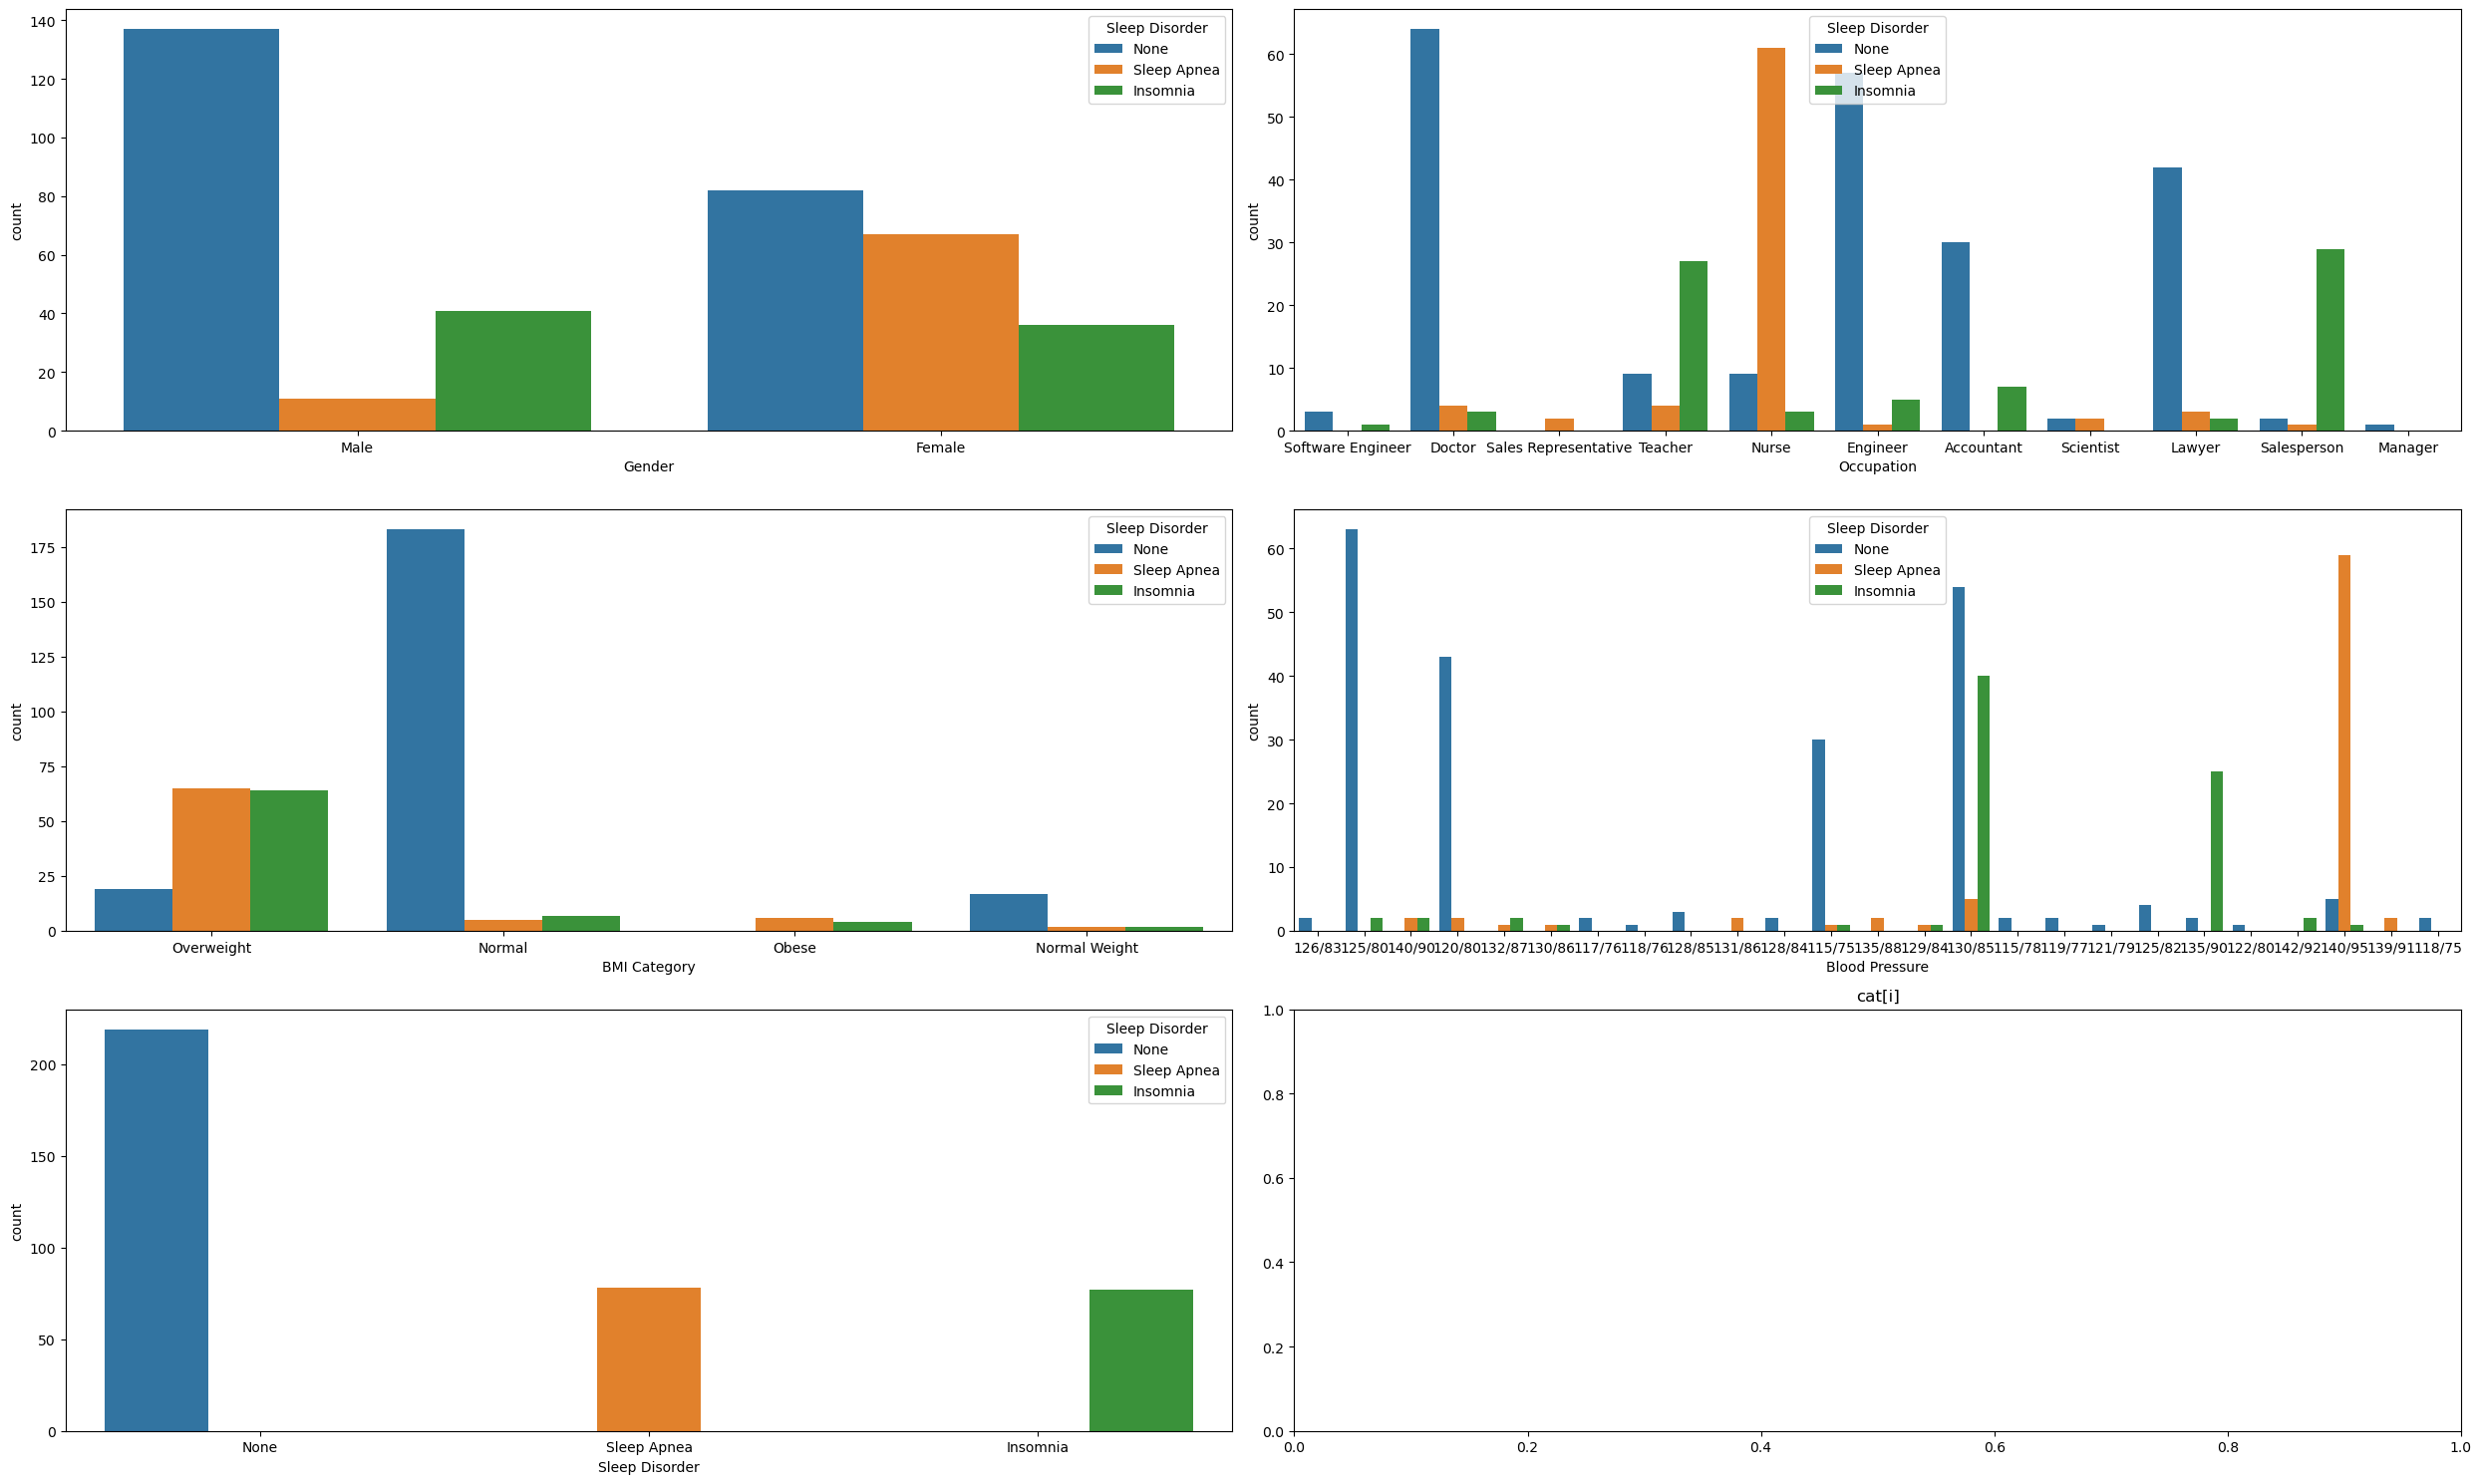

In [266]:
fig, ax= plt.subplots(3,2, figsize=(25,15))
for i, subplot in zip(cat, ax.flatten()):
    sns.countplot(x=cat[i],hue=df['Sleep Disorder'] ,ax=subplot)
    plt.title('cat[i]')
plt.tight_layout()
plt.show()

Reasons for Sleep disorder-Insomnia are
1.Lower Sleep duartion
2.Low Quality of sleep
3.less Physical activity Level
4.High Stress level
5.High heart rate which is effect of high stress level.
6.Less Daily steps walk  which related to physical activity level.
7.Insomnia may be developed /our found in age between 40 to 50.
8.Occupation Salesperson are highly affected with this insomnia.



Reasons for disorder of Sleep Apnea-
1.High Physical Activity
2.High Heart Rate.
3.This isorder may cause in the age between 50 and above.
4.Occupation Nurse is worstly affected by Sleep apnea.

Both the disorders are found mostly in Females than Males.
Mostly Overweight category develope this sleep disorder.



<AxesSubplot:xlabel='Sleep Disorder', ylabel='count'>

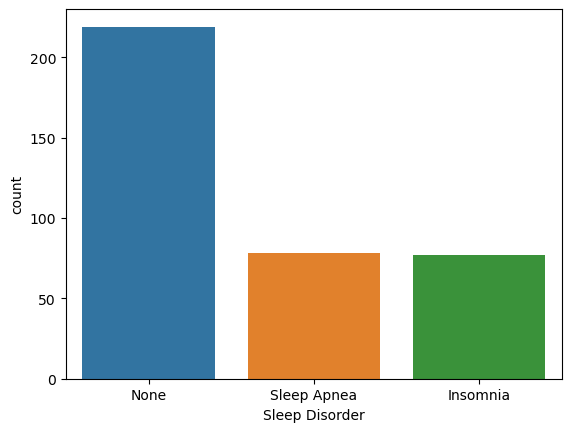

In [267]:
sns.countplot(df['Sleep Disorder'])

In [268]:
#Our target variable is imbalance so need to treat.

In [269]:
df.drop('Person ID',axis=1,inplace=True)

In [270]:
from scipy.stats import chi2_contingency
from scipy import stats

In [271]:
table =pd.crosstab(df['Gender'],df['Sleep Disorder'])
Observed=table.values
p=stats.chi2_contingency(Observed)
p

(54.30602007353474,
 1.6128633524576768e-12,
 2,
 array([[ 38.08823529, 108.32887701,  38.5828877 ],
        [ 38.91176471, 110.67112299,  39.4171123 ]]))

In [272]:
table =pd.crosstab(df['Occupation'],df['Sleep Disorder'])
Observed=table.values
p=stats.chi2_contingency(Observed)
p

(421.362754888135,
 7.481314161858014e-77,
 20,
 array([[ 7.61764706, 21.6657754 ,  7.71657754],
        [14.61764706, 41.57486631, 14.80748663],
        [12.97058824, 36.89037433, 13.13903743],
        [ 9.67647059, 27.52139037,  9.80213904],
        [ 0.20588235,  0.5855615 ,  0.20855615],
        [15.02941176, 42.7459893 , 15.22459893],
        [ 0.41176471,  1.17112299,  0.4171123 ],
        [ 6.58823529, 18.73796791,  6.67379679],
        [ 0.82352941,  2.34224599,  0.8342246 ],
        [ 0.82352941,  2.34224599,  0.8342246 ],
        [ 8.23529412, 23.42245989,  8.34224599]]))

In [273]:
table =pd.crosstab(df['BMI Category'],df['Sleep Disorder'])
Observed=table.values
p=stats.chi2_contingency(Observed)
p

(246.96816290222125,
 1.8229320902156188e-50,
 6,
 array([[ 40.14705882, 114.18449198,  40.6684492 ],
        [  4.32352941,  12.29679144,   4.37967914],
        [  2.05882353,   5.85561497,   2.0855615 ],
        [ 30.47058824,  86.6631016 ,  30.86631016]]))

In [274]:
table =pd.crosstab(df['Blood Pressure'],df['Sleep Disorder'])
Observed=table.values
p=stats.chi2_contingency(Observed)
p

(453.15275976178464,
 2.5282470658010962e-67,
 48,
 array([[ 6.58823529, 18.73796791,  6.67379679],
        [ 0.41176471,  1.17112299,  0.4171123 ],
        [ 0.41176471,  1.17112299,  0.4171123 ],
        [ 0.41176471,  1.17112299,  0.4171123 ],
        [ 0.20588235,  0.5855615 ,  0.20855615],
        [ 0.41176471,  1.17112299,  0.4171123 ],
        [ 9.26470588, 26.35026738,  9.38502674],
        [ 0.20588235,  0.5855615 ,  0.20855615],
        [ 0.20588235,  0.5855615 ,  0.20855615],
        [13.38235294, 38.06149733, 13.55614973],
        [ 0.82352941,  2.34224599,  0.8342246 ],
        [ 0.41176471,  1.17112299,  0.4171123 ],
        [ 0.41176471,  1.17112299,  0.4171123 ],
        [ 0.61764706,  1.75668449,  0.62566845],
        [ 0.41176471,  1.17112299,  0.4171123 ],
        [20.38235294, 57.97058824, 20.64705882],
        [ 0.41176471,  1.17112299,  0.4171123 ],
        [ 0.41176471,  1.17112299,  0.4171123 ],
        [ 0.61764706,  1.75668449,  0.62566845],
        [ 0.411764

The small p-value indicates that the variable being examined is likely to have a significant impact on the classification 
task. It suggests that the variable provides valuable information or predictive power regarding Sleep Disorder.

Based on this information, it would be reasonable to consider the variable for classification purposes, as it appears to be 
statistically significant and potentially relevant in predicting or explaining the Sleep Disorder.

In [275]:
target = df['Sleep Disorder']

# Define the mapping of categories to numerical values
category_mapping = {'None': 0, 'Sleep Apnea': 1, 'Insomnia': 2}

# Perform ordinal encoding by mapping the categories to numerical values
df['Sleep Disorder'] = [category_mapping[category] for category in target]

In [276]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,0
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,1
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,1


<AxesSubplot:xlabel='Sleep Disorder', ylabel='count'>

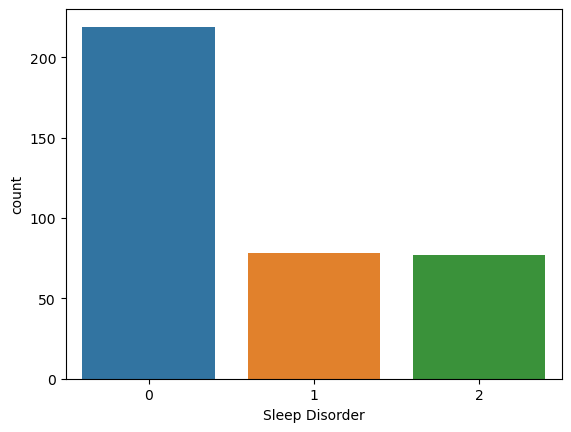

In [277]:
sns.countplot(df['Sleep Disorder'])

In [278]:
df['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [279]:

numerators, denominators = zip(*[ratio.split('/') for ratio in df['Blood Pressure']])
numerators = list(map(int, numerators))
denominators = list(map(int, denominators))
ratio_values = [numerator / denominator for numerator, denominator in zip(numerators, denominators)]

bin_check = [0,1.5, 2.0, 3.0]
bin_labels = ['Low', 'Medium', 'High']

ratio_bins = pd.cut(ratio_values, bins=bin_check, labels=bin_labels, include_lowest=True)
df['Blood Pressure'] = ratio_bins 









In [280]:
df['Blood Pressure'].value_counts()

Medium    235
Low       139
High        0
Name: Blood Pressure, dtype: int64

In [281]:
df_co = df.copy()

In [282]:
df = pd.get_dummies(df,drop_first=True)
df

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Gender_Male,Occupation_Doctor,...,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Blood Pressure_Medium,Blood Pressure_High
0,27,6.1,6,42,6,77,4200,0,1,0,...,0,0,0,1,0,0,0,1,1,0
1,28,6.2,6,60,8,75,10000,0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,28,6.2,6,60,8,75,10000,0,1,1,...,0,0,0,0,0,0,0,0,1,0
3,28,5.9,4,30,8,85,3000,1,1,0,...,1,0,0,0,0,0,1,0,1,0
4,28,5.9,4,30,8,85,3000,1,1,0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,68,7000,1,0,0,...,0,0,0,0,0,0,0,1,0,0
370,59,8.0,9,75,3,68,7000,1,0,0,...,0,0,0,0,0,0,0,1,0,0
371,59,8.1,9,75,3,68,7000,1,0,0,...,0,0,0,0,0,0,0,1,0,0
372,59,8.1,9,75,3,68,7000,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [283]:
def get_train_report(model):
    train_pred = model.predict(x_train)
    return (classification_report(y_train,train_pred))

def get_test_report(model):
    test_pred = model.predict(x_test)
    return (classification_report(y_test,test_pred))

def plot_curve(model):
    y_pred_prob =  model.predict_proba(x_test)[:,1]
    fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)
    plt.plot(fpr,tpr)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.plot([0,1],[0,1],'r--')

In [284]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

sm = SMOTE()
x = df.drop('Sleep Disorder',axis=1)
y= df['Sleep Disorder']
x_new,y_new =sm.fit_resample(x,y)
x_train,x_test,y_train,y_test =train_test_split(x_new,y_new,test_size = 0.3,random_state=10)

<AxesSubplot:xlabel='Sleep Disorder', ylabel='count'>

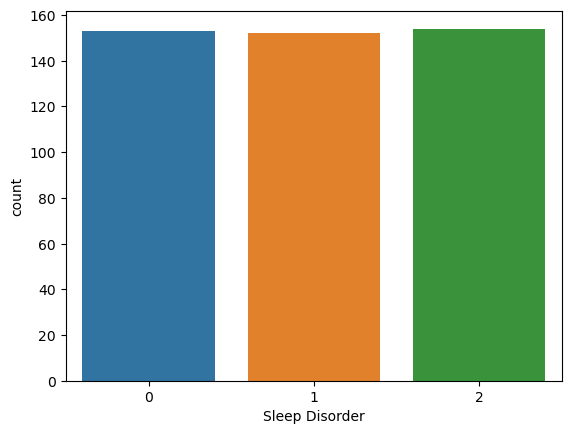

In [285]:
sns.countplot(y_train)

In [286]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree_model = decision_tree_classification.fit(x_train, y_train)
print( get_train_report(decision_tree_model))
print( get_test_report(decision_tree_model))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       153
           1       0.98      0.97      0.97       152
           2       0.99      0.94      0.96       154

    accuracy                           0.96       459
   macro avg       0.96      0.96      0.96       459
weighted avg       0.96      0.96      0.96       459

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        66
           1       0.91      0.87      0.89        67
           2       0.90      0.97      0.93        65

    accuracy                           0.91       198
   macro avg       0.91      0.91      0.91       198
weighted avg       0.91      0.91      0.91       198



both models show high accuracy and good performance across the different evaluation metrics, suggesting effective 
classification capabilities for the given multi-class classification problems.

In [287]:
tuned_parameter = [{'criterion':['entropy','gini'],
                                         'max_depth':range(2,5),
                                         'max_features':['sqrt','log2'],
                                         'max_leaf_nodes':range(2,5),
                                         'min_samples_leaf':range(2,5),
                                         'min_samples_split':range(2,6)}]
dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=10),param_grid=tuned_parameter,cv=3)
dt_model = dt.fit(x_train,y_train)
print('best_features are :',dt_model.best_params_)

best_features are : {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [288]:
dt_model = DecisionTreeClassifier(criterion=dt_model.best_params_.get('criterion'),
                                  max_depth=dt_model.best_params_.get('max_depth'),
                                  max_features=dt_model.best_params_.get('max_features'),
                                  max_leaf_nodes=dt_model.best_params_.get('max_leaf_node'),
                                  min_samples_leaf=dt_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split=dt_model.best_params_.get('min_samples_split'),
                                  random_state=10
                                   )
dt_model = dt_model.fit(x_train,y_train)
print(get_train_report(dt_model))
print(get_test_report(dt_model))

              precision    recall  f1-score   support

           0       0.91      0.49      0.64       153
           1       0.69      0.87      0.77       152
           2       0.74      0.90      0.81       154

    accuracy                           0.75       459
   macro avg       0.78      0.75      0.74       459
weighted avg       0.78      0.75      0.74       459

              precision    recall  f1-score   support

           0       0.93      0.39      0.55        66
           1       0.66      0.81      0.72        67
           2       0.73      0.98      0.84        65

    accuracy                           0.73       198
   macro avg       0.77      0.73      0.70       198
weighted avg       0.77      0.73      0.70       198



In [289]:
#after smote analysis and hyperparameter tunning model is not overfitting but the accuracy of the model is not that much good.

In [290]:
tuned_parameter = [{'criterion':['entropy','gini'],
                    'n_estimators':[1,3,5,9,11],
                                         'max_depth':range(2,5),
                                         'max_features':['sqrt','log2'],
                                         'max_leaf_nodes':range(2,5),
                                         'min_samples_leaf':range(2,5),
                                         'min_samples_split':range(2,6)}]
rf = GridSearchCV(estimator=RandomForestClassifier(random_state=10),param_grid=tuned_parameter,cv=3)
rf_model = rf.fit(x_train,y_train)
print('best_features are :',rf_model.best_params_)

best_features are : {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 5}


In [291]:
rf_model = RandomForestClassifier(criterion=rf_model.best_params_.get('criterion'),
                                  n_estimators =rf_model.best_params_.get('n_estimators'),
                                  max_depth=rf_model.best_params_.get('max_depth'),
                                  max_features=rf_model.best_params_.get('max_features'),
                                  max_leaf_nodes=rf_model.best_params_.get('max_leaf_node'),
                                  min_samples_leaf=rf_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split=rf_model.best_params_.get('min_samples_split'),
                                  random_state=10
                                   )
rf_model = rf_model.fit(x_train,y_train)
print(get_train_report(rf_model))
print(get_test_report(rf_model))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       153
           1       0.97      0.78      0.86       152
           2       0.83      0.88      0.86       154

    accuracy                           0.86       459
   macro avg       0.87      0.86      0.86       459
weighted avg       0.87      0.86      0.86       459

              precision    recall  f1-score   support

           0       0.85      0.86      0.86        66
           1       0.92      0.73      0.82        67
           2       0.81      0.97      0.88        65

    accuracy                           0.85       198
   macro avg       0.86      0.85      0.85       198
weighted avg       0.86      0.85      0.85       198



In [292]:
#We can clearly conclude the model is very well learned on test data .
#Model is not overfitting.
#And accuracy of the model is also good then descision tree.

In [293]:
ada_model =AdaBoostClassifier(n_estimators = 40,random_state = 10)
ada_model = ada_model.fit(x_train,y_train)
print(get_train_report(ada_model))
print(get_test_report(ada_model))

              precision    recall  f1-score   support

           0       0.67      0.93      0.78       153
           1       0.90      0.83      0.86       152
           2       0.83      0.56      0.67       154

    accuracy                           0.77       459
   macro avg       0.80      0.77      0.77       459
weighted avg       0.80      0.77      0.77       459

              precision    recall  f1-score   support

           0       0.73      0.92      0.82        66
           1       0.92      0.82      0.87        67
           2       0.82      0.69      0.75        65

    accuracy                           0.81       198
   macro avg       0.82      0.81      0.81       198
weighted avg       0.82      0.81      0.81       198



In [294]:
#For ada boosting algorithm we conclude that model is not overfitting but the accuracy is not so good.

In [295]:
gboost_model = GradientBoostingClassifier(n_estimators = 30,max_depth = 10,learning_rate = 0.01,random_state=10)
gboost_model.fit(x_train,y_train)
print(get_train_report(gboost_model))
print(get_test_report(gboost_model))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       153
           1       0.98      0.97      0.97       152
           2       0.98      0.95      0.96       154

    accuracy                           0.96       459
   macro avg       0.96      0.96      0.96       459
weighted avg       0.96      0.96      0.96       459

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        66
           1       0.90      0.85      0.88        67
           2       0.84      0.95      0.89        65

    accuracy                           0.89       198
   macro avg       0.90      0.89      0.89       198
weighted avg       0.90      0.89      0.89       198



In [296]:
#Gradient boosting is not good fir as model is well trained with train data but not able to capture that much on test data so 
#it is overfitting condition.

In [297]:
 tuning_parameters = {'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015],
                    'max_depth': [2, 3, 4, 5, 6],
                    'gamma': [2, 3, 4, 5, 6],
                    'n_estimators': [100, 120, 150]}

xgb_model = XGBClassifier()

xgb_grid = GridSearchCV(estimator= xgb_model,param_grid = tuning_parameters, cv = 5)
xgb_grid.fit(x_train, y_train)

print('Bst parameters for XGBOOST Classifier', xgb_grid.best_params_, '\n')

xgb_with_best_parameteers = XGBClassifier(gamma = xgb_grid.best_params_.get('gamma'),
                                         learning_rate = xgb_grid.best_params_.get('learning_rate'),
                                         max_depth = xgb_grid.best_params_.get('max_depth'),
                                         n_estimators = xgb_grid.best_params_.get('n_estimators'))
xgb_model_with_best1 = xgb_with_best_parameteers.fit(x_train, y_train)

Bst parameters for XGBOOST Classifier {'gamma': 2, 'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 100} 



In [298]:
print(get_train_report(xgb_model_with_best1))
print(get_test_report(xgb_model_with_best1))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       153
           1       0.96      0.89      0.92       152
           2       0.93      0.87      0.90       154

    accuracy                           0.90       459
   macro avg       0.91      0.90      0.90       459
weighted avg       0.91      0.90      0.90       459

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        66
           1       0.90      0.84      0.87        67
           2       0.87      0.94      0.90        65

    accuracy                           0.89       198
   macro avg       0.89      0.89      0.89       198
weighted avg       0.89      0.89      0.89       198



In [299]:
#accuracy of train data is more than accuracy of test data so the model is overfitting.

In [314]:
important_feature = pd.DataFrame({'Features':x_train.columns,
                                 'Importance':rf_model.feature_importances_})
important_feature=important_feature.sort_values('Importance',ascending=False)
important_feature

,Features,Importance
0,Age,0.282237
20,BMI Category_Overweight,0.221234
6,Daily Steps,0.162215
2,Quality of Sleep,0.134712
5,Heart Rate,0.083392
1,Sleep Duration,0.067644
4,Stress Level,0.048566
14,Occupation_Salesperson,0.000000
21,Blood Pressure_Medium,0.000000
19,BMI Category_Obese,0.000000


<AxesSubplot:xlabel='Importance', ylabel='Features'>

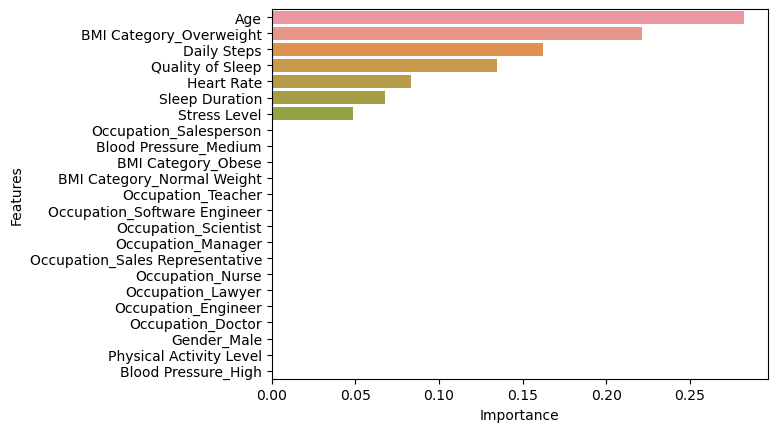

In [315]:
sns.barplot(x='Importance',y = 'Features',data=important_feature)

Age ,BMI category overweight Daily steps Quality of sleeps ,heart rate stress level and sleep duration are important factorse in finding sleep disorder.